Carga de librerías

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

C:\Users\camil\AppData\Local\Temp\ipykernel_22380\3951150345.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Carga de los datos

In [3]:
data=pd.read_csv("real_estate_valuation_data_set.csv",index_col=0,sep=",")
data.columns=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude","House_price_unit_area"]
data.shape
data.head()


,Transaction_date,House_age,d_nearest_MRTstation,num_convinience_stores,latitude,longitude,House_price_unit_area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.describe()

,Transaction_date,House_age,d_nearest_MRTstation,num_convinience_stores,latitude,longitude,House_price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Graficación de histogramas y dispersión

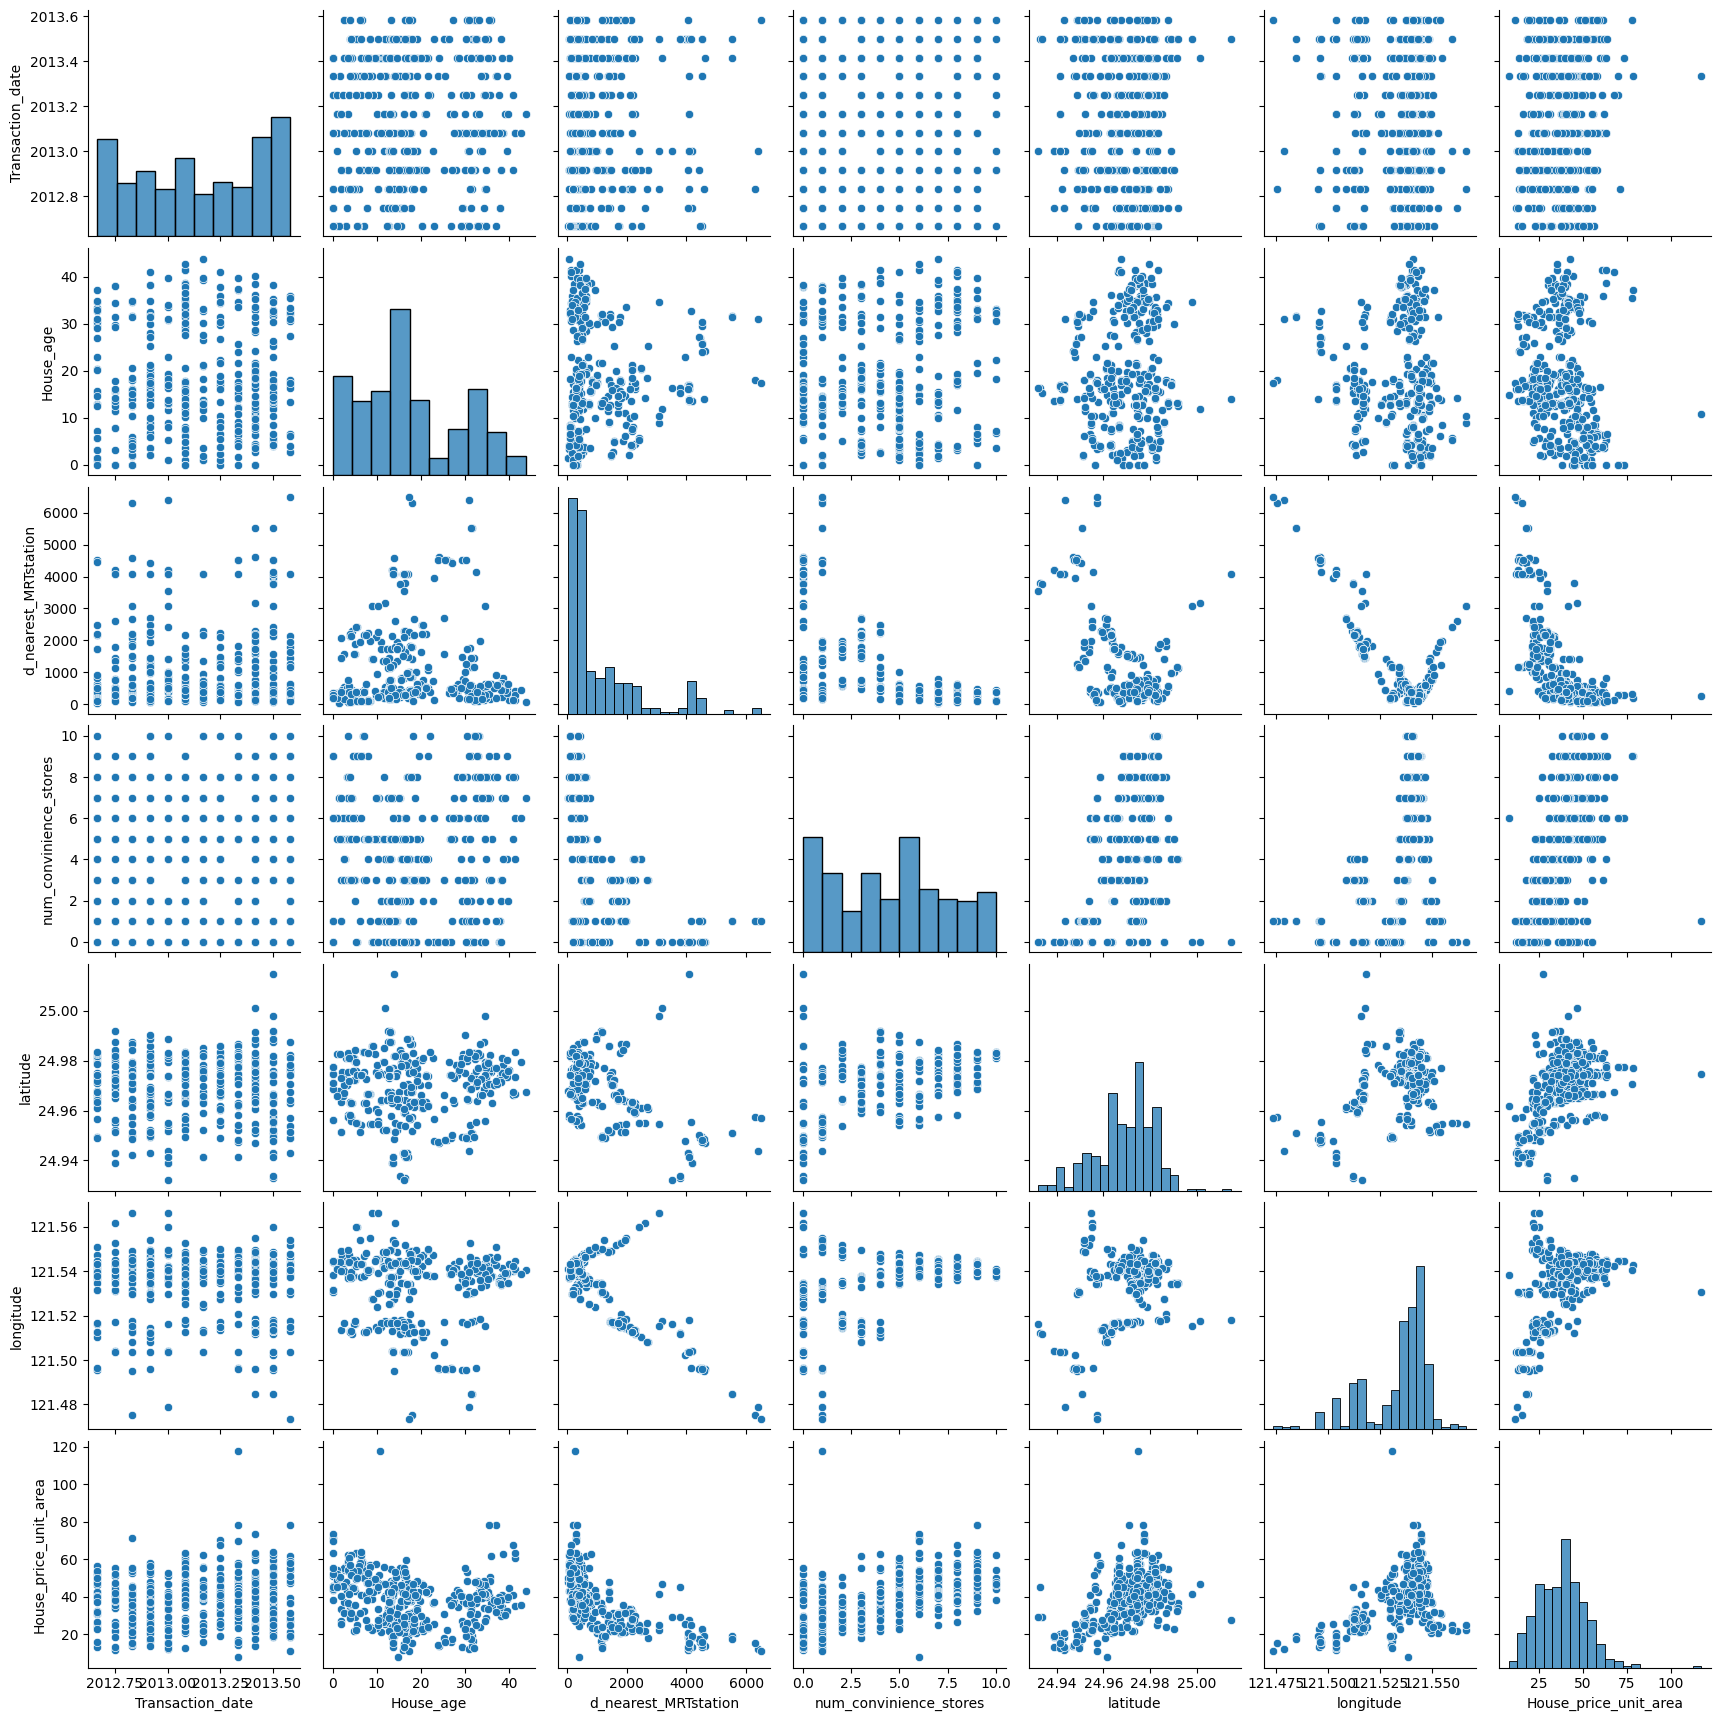

In [4]:
sns.pairplot(data,)

### Correlaciones

<Axes: >

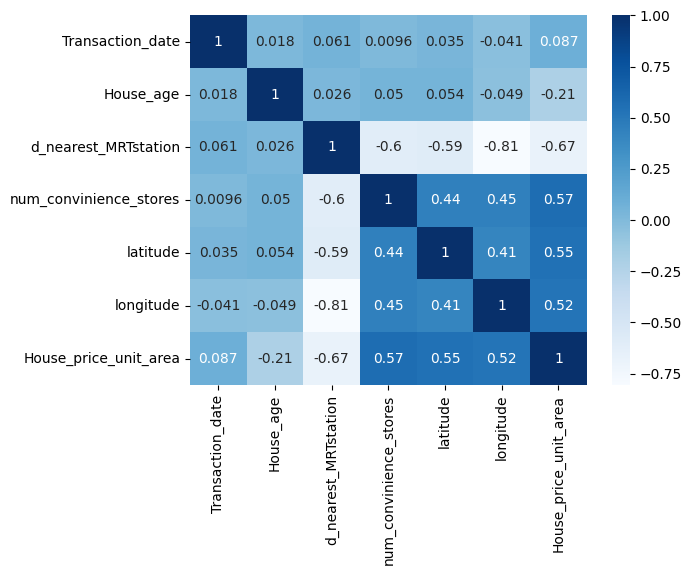

In [5]:
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### Dispersión 

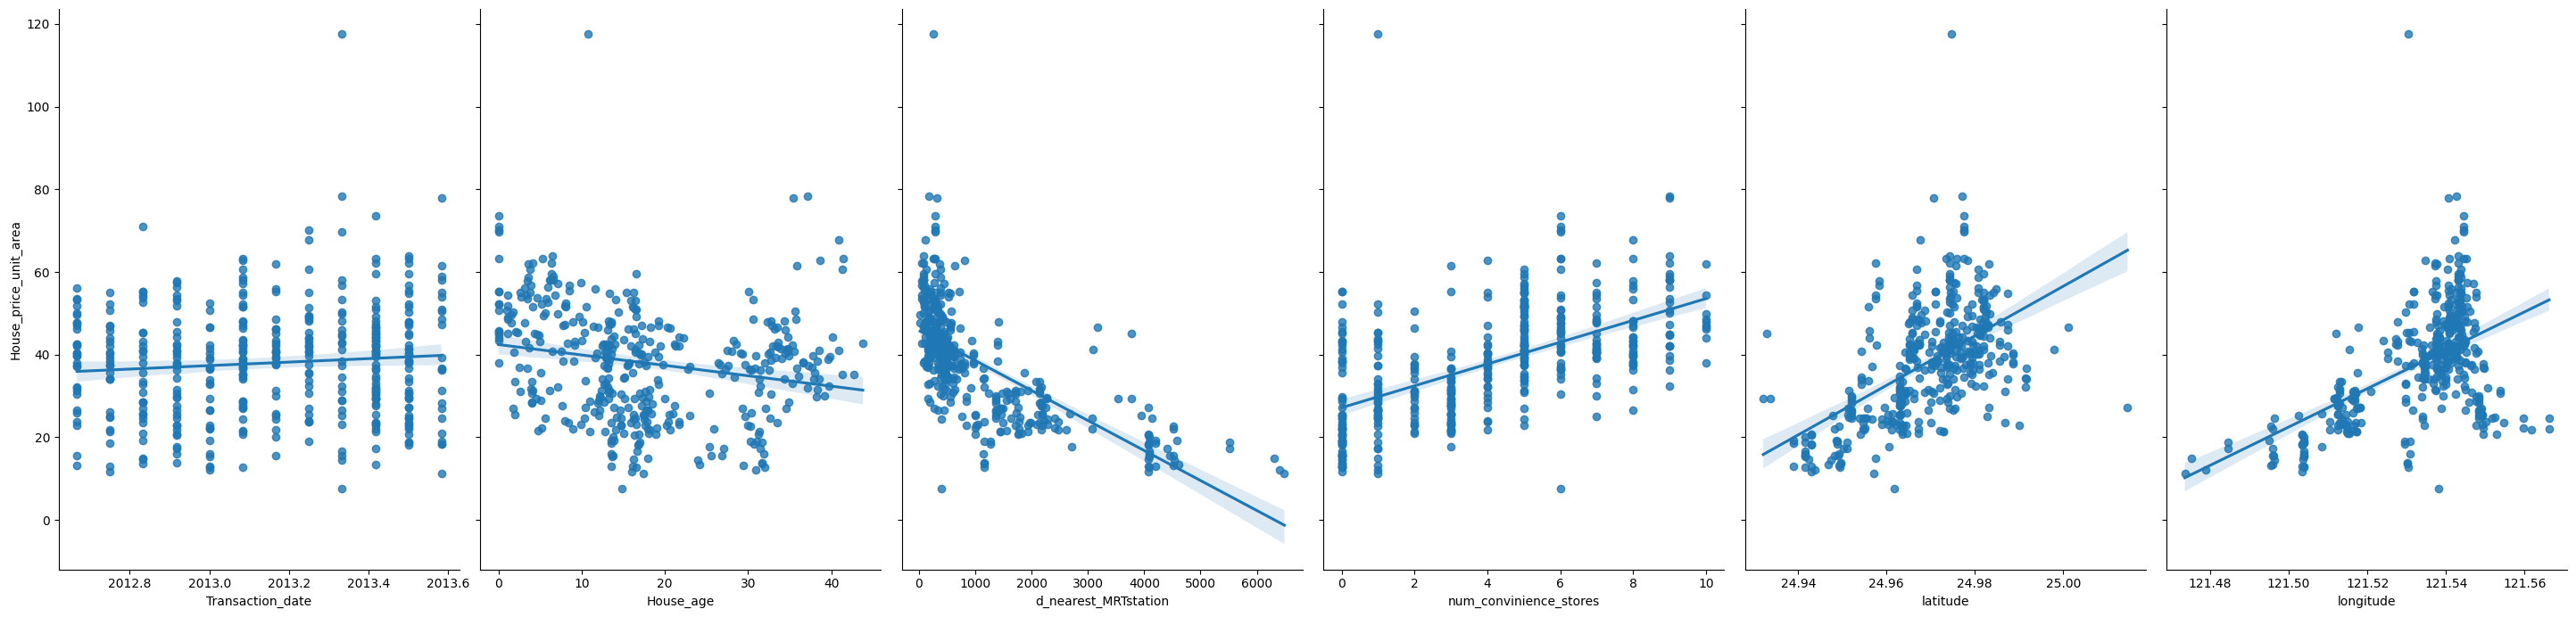

In [6]:
sns.pairplot(data, x_vars=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude"], y_vars="House_price_unit_area", height=7, aspect=0.7, kind='reg')

### Modelo de regresión

$y=\beta_0+ \beta_1*transactiondate+\beta_2* houseage	+\beta_3*distancetothenearestMRTstation+\beta_4*numberofconveniencestores+\beta_5 *latitude+\beta_6 *longitude$

In [4]:
# nombres de características
features=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude"]

# dataframe de características
X = data[features]

X.head()

,Transaction_date,House_age,d_nearest_MRTstation,num_convinience_stores,latitude,longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [9]:
X.shape

(414, 6)

In [5]:
# variable de respuesta
y = data['House_price_unit_area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: House_price_unit_area, dtype: float64

In [11]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Divisón entrenamiento-prueba

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(310, 6)
(310,)
(104, 6)
(104,)


In [14]:
print(X.head())
print(X_train.head())

    Transaction_date  House_age  d_nearest_MRTstation  num_convinience_stores  \
No                                                                              
1           2012.917       32.0              84.87882                      10   
2           2012.917       19.5             306.59470                       9   
3           2013.583       13.3             561.98450                       5   
4           2013.500       13.3             561.98450                       5   
5           2012.833        5.0             390.56840                       5   

    latitude  longitude  
No                       
1   24.98298  121.54024  
2   24.98034  121.53951  
3   24.98746  121.54391  
4   24.98746  121.54391  
5   24.97937  121.54245  
     Transaction_date  House_age  d_nearest_MRTstation  \
No                                                       
369          2013.417       18.2              350.8515   
219          2013.417       13.6              492.2313   
128          2013.

In [7]:
# cambiando el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [16]:
# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(289, 6)
(289,)
(125, 6)
(125,)


In [8]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [18]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

-13450.059643281304
[ 4.12730471e+00 -2.27169419e-01 -4.18081947e-03  1.19484874e+00
  2.22609979e+02 -3.09227717e+00]


In [9]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Transaction_date', 4.12730470760849),
 ('House_age', -0.22716941858012757),
 ('d_nearest_MRTstation', -0.0041808194697654484),
 ('num_convinience_stores', 1.1948487440337898),
 ('latitude', 222.60997865174664),
 ('longitude', -3.0922771653045933)]

In [10]:
#predicción con datos de prueba
y_pred = linreg.predict(X_test)

#### MSE, MAE y RMSE - Evaluación del modelo

In [11]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  6.27498490778259
MSE:  105.56582053294784
RMSE:  10.274522885903162


## Validación cruzada

In [22]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [23]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [24]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.693434260346574


## Análisis con Statsmodels

In [25]:
import statsmodels.api as sm

features =["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude"]#,"longitude"]

X = data[features]
y = data.House_price_unit_area

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     House_price_unit_area   R-squared:                       0.542
Model:                               OLS   Adj. R-squared:                  0.535
Method:                    Least Squares   F-statistic:                     72.05
Date:                   Mon, 12 Feb 2024   Prob (F-statistic):           1.46e-49
Time:                           19:56:09   Log-Likelihood:                -1129.2
No. Observations:                    310   AIC:                             2270.
Df Residuals:                        304   BIC:                             2293.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [26]:
datos_borrar=data.loc[data["d_nearest_MRTstation"]>=3500,]
print(datos_borrar)

     Transaction_date  House_age  d_nearest_MRTstation  \
No                                                       
9            2013.500       31.7              5512.038   
31           2013.500       25.9              4519.690   
36           2013.500       13.9              4079.418   
41           2013.000       13.6              4082.015   
42           2013.500       16.8              4066.587   
49           2013.417       24.2              4605.749   
50           2012.667       29.4              4510.359   
59           2013.500       30.3              4510.359   
74           2013.167       13.8              4082.015   
88           2013.583       16.9              4066.587   
90           2013.500       23.0              3947.945   
117          2013.000       30.9              6396.283   
118          2013.000       13.6              4197.349   
149          2013.500       16.4              3780.590   
155          2013.500       16.9              4066.587   
156          2

# Insertando filtración de datos atípicos

In [37]:
data_nueva=data[data["d_nearest_MRTstation"]<3500]
data_nueva=data_nueva[data_nueva["House_price_unit_area"]<78]
data_nueva=data_nueva[data_nueva["latitude"]>24.94]
data_nueva=data_nueva[data_nueva["latitude"]<25]

print(data_nueva.count())

Transaction_date          373
House_age                 373
d_nearest_MRTstation      373
num_convinience_stores    373
latitude                  373
longitude                 373
House_price_unit_area     373
dtype: int64


<Axes: >

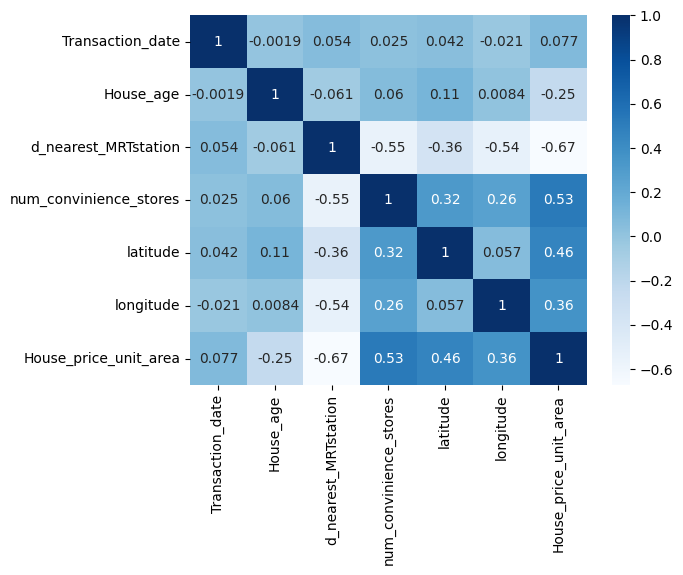

In [38]:
corr = data_nueva.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [39]:
# nombres de características
features=["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude","longitude"]

# dataframe de características
X = data_nueva[features]
# variable de respuesta
y = data_nueva['House_price_unit_area']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.155)


In [41]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [42]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('Transaction_date', 4.231123080453587),
 ('House_age', -0.3277922884478373),
 ('d_nearest_MRTstation', -0.008636179247064302),
 ('num_convinience_stores', 0.7085413238269551),
 ('latitude', 285.88817198288154),
 ('longitude', 34.33482642102922)]

In [43]:
#predicción con datos de prueba
y_pred = linreg.predict(X_test)

In [47]:
from sklearn import metrics
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.585149147640864
MSE:  66.60360779189497
RMSE:  8.161103344027385


In [46]:
import statsmodels.api as sm

features =["Transaction_date","House_age","d_nearest_MRTstation","num_convinience_stores","latitude"]#,"longitude"]

X = data_nueva[features]
y = data_nueva.House_price_unit_area

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.155)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     House_price_unit_area   R-squared:                       0.659
Model:                               OLS   Adj. R-squared:                  0.654
Method:                    Least Squares   F-statistic:                     119.6
Date:                   Mon, 12 Feb 2024   Prob (F-statistic):           4.57e-70
Time:                           21:33:21   Log-Likelihood:                -1050.3
No. Observations:                    315   AIC:                             2113.
Df Residuals:                        309   BIC:                             2135.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------